
## Load The data

In [ ]:
# Step 1: Data Loading and Initial Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Amazon Sales data.csv')

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Get basic statistics
print("\nBasic statistics:")
print(df.describe())

# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate shipping time
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

print("\nDataframe info after preprocessing:")
print(df.info())

# Display the first few rows of the dataframe
print("\nFirst few rows of the dataframe:")
print(df.head())

Missing values:
Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

Basic statistics:
           Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
mean   5.550204e+08  5128.710000  276.761300  191.048000   1.373488e+06   
std    2.606153e+08  2794.484562  235.592241  188.208181   1.460029e+06   
min    1.146066e+08   124.000000    9.330000    6.920000   4.870260e+03   
25%    3.389225e+08  2836.250000   81.730000   35.840000   2.687212e+05   
50%    5.577086e+08  5382.500000  179.880000  107.275000   7.523144e+05   
75%    7.907551e+08  7369.000000  437.200000  263.330000   2.212045e+06   
max    9.940222e+08  9925.000000  668.270000  524.960000   5.997055e+06 

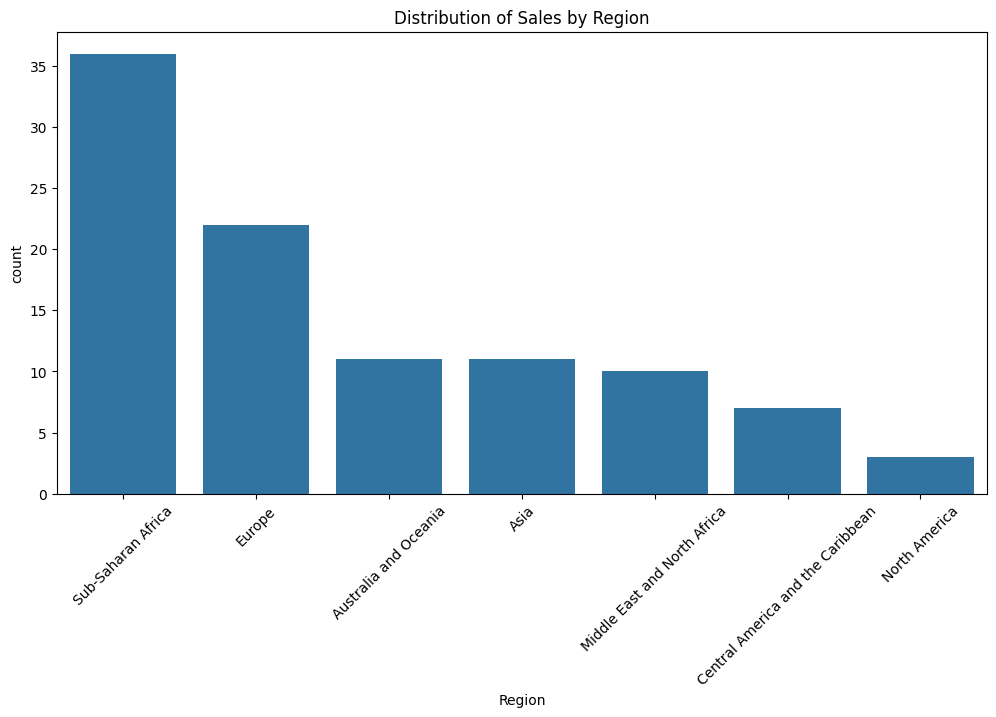

In [ ]:
# Plot the distribution of sales by region
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Distribution of Sales by Region')
plt.xticks(rotation=45)
plt.show()

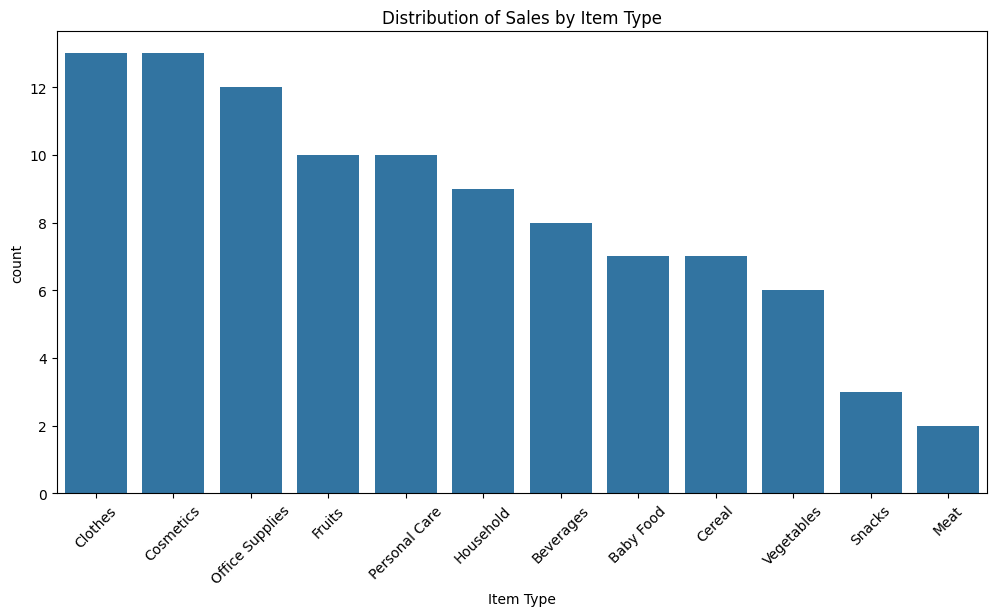

In [ ]:
# Plot the distribution of sales by item type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Item Type', order=df['Item Type'].value_counts().index)
plt.title('Distribution of Sales by Item Type')
plt.xticks(rotation=45)
plt.show()

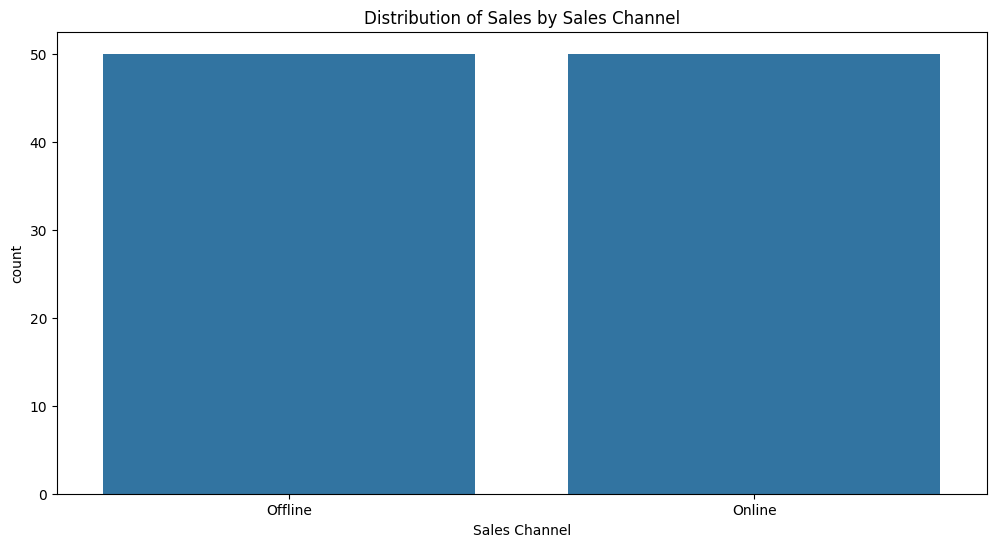

In [ ]:
# Plot the distribution of sales by sales channel
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sales Channel')
plt.title('Distribution of Sales by Sales Channel')
plt.show()

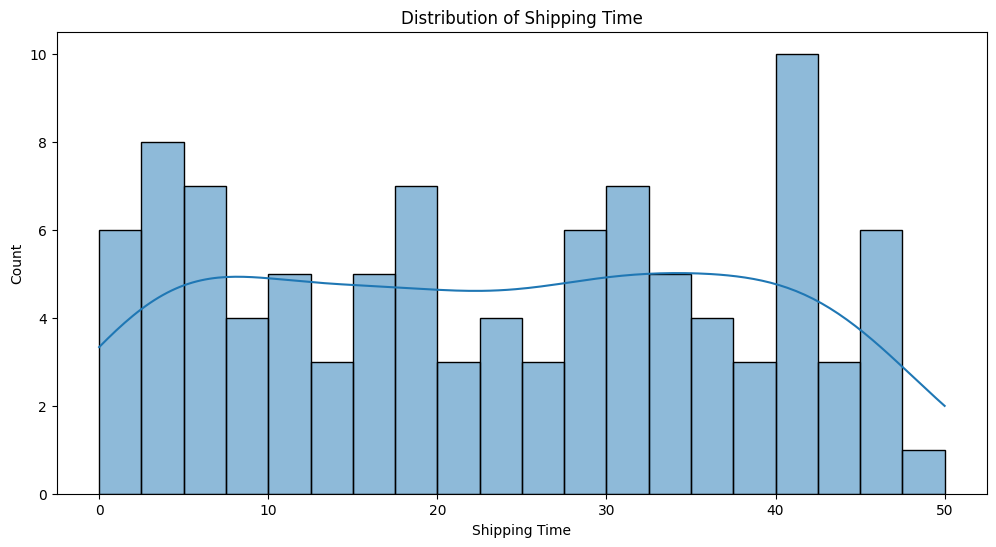

In [ ]:
# Plot the distribution of shipping time
plt.figure(figsize=(12, 6))
sns.histplot(df['Shipping Time'], bins=20, kde=True)
plt.title('Distribution of Shipping Time')
plt.show()

In [ ]:
from scipy import stats

# Load the data (assuming it's already loaded, but including this for completeness)
df = pd.read_csv('Amazon Sales data.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# 3.1 Correlation between numerical variables
numerical_cols = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Shipping Time']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()

# 3.2 Time series analysis of sales over time
df['Order Date'] = pd.to_datetime(df['Order Date'])
df_sorted = df.sort_values('Order Date')
df_sorted['Cumulative Revenue'] = df_sorted['Total Revenue'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Order Date'], df_sorted['Cumulative Revenue'])
plt.title('Cumulative Revenue Over Time')
plt.xlabel('Order Date')
plt.ylabel('Cumulative Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cumulative_revenue.png')
plt.close()

# 3.3 Profit analysis by region and item type
avg_profit_by_region = df.groupby('Region')['Total Profit'].mean().sort_values(ascending=False)
avg_profit_by_item = df.groupby('Item Type')['Total Profit'].mean().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

sns.barplot(x=avg_profit_by_region.index, y=avg_profit_by_region.values, ax=ax1)
ax1.set_title('Average Profit by Region')
ax1.set_xlabel('Region')
ax1.set_ylabel('Average Profit')
ax1.tick_params(axis='x', rotation=45)

sns.barplot(x=avg_profit_by_item.index, y=avg_profit_by_item.values, ax=ax2)
ax2.set_title('Average Profit by Item Type')
ax2.set_xlabel('Item Type')
ax2.set_ylabel('Average Profit')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('profit_analysis.png')
plt.close()

print("Analysis complete. Images saved as 'correlation_heatmap.png', 'cumulative_revenue.png', and 'profit_analysis.png'.")

# Display top 5 most profitable regions and item types
print("\
Top 5 Most Profitable Regions:")
print(avg_profit_by_region.head())

print("\
Top 5 Most Profitable Item Types:")
print(avg_profit_by_item.head())

Analysis complete. Images saved as 'correlation_heatmap.png', 'cumulative_revenue.png', and 'profit_analysis.png'.
Top 5 Most Profitable Regions:
Region
Middle East and North Africa    576119.186000
Asia                            555804.170000
Europe                          503769.937727
North America                   485980.920000
Australia and Oceania           429287.275455
Name: Total Profit, dtype: float64
Top 5 Most Profitable Item Types:
Item Type
Cosmetics          1.119696e+06
Household          8.236229e+05
Baby Food          5.552348e+05
Office Supplies    4.941320e+05
Clothes            4.025642e+05
Name: Total Profit, dtype: float64


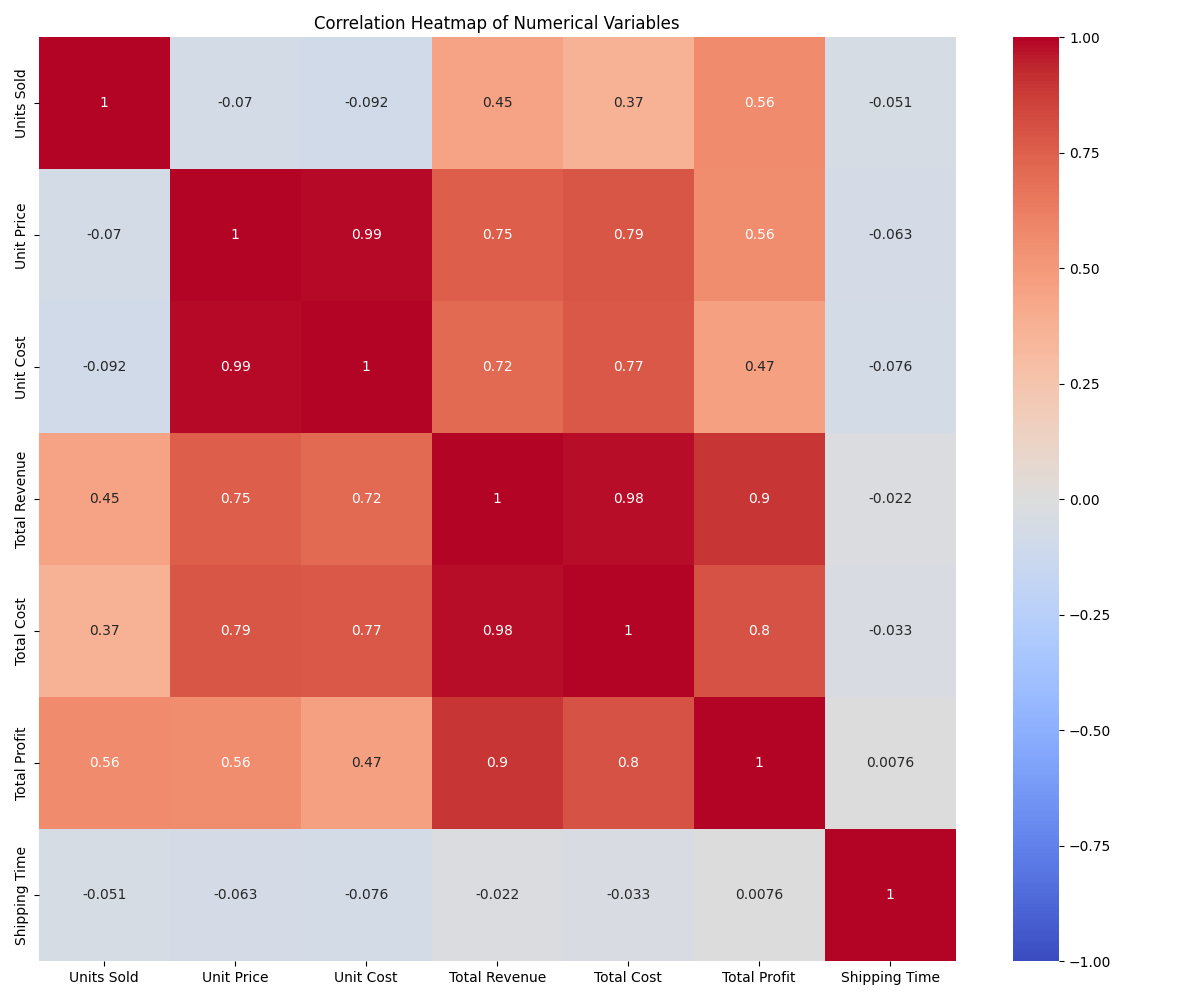

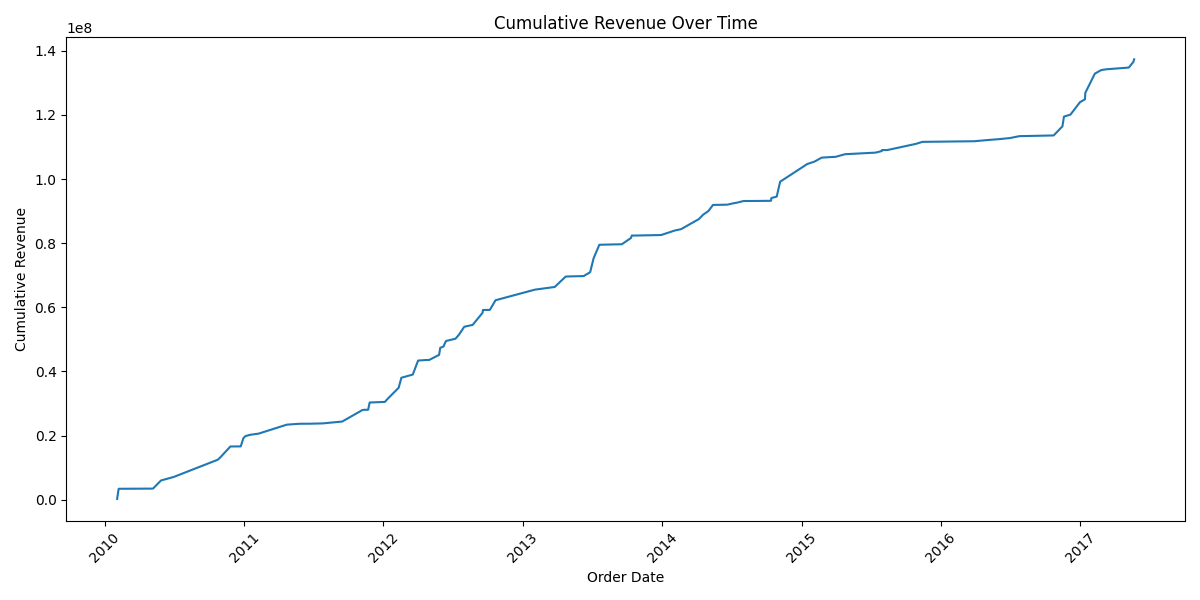

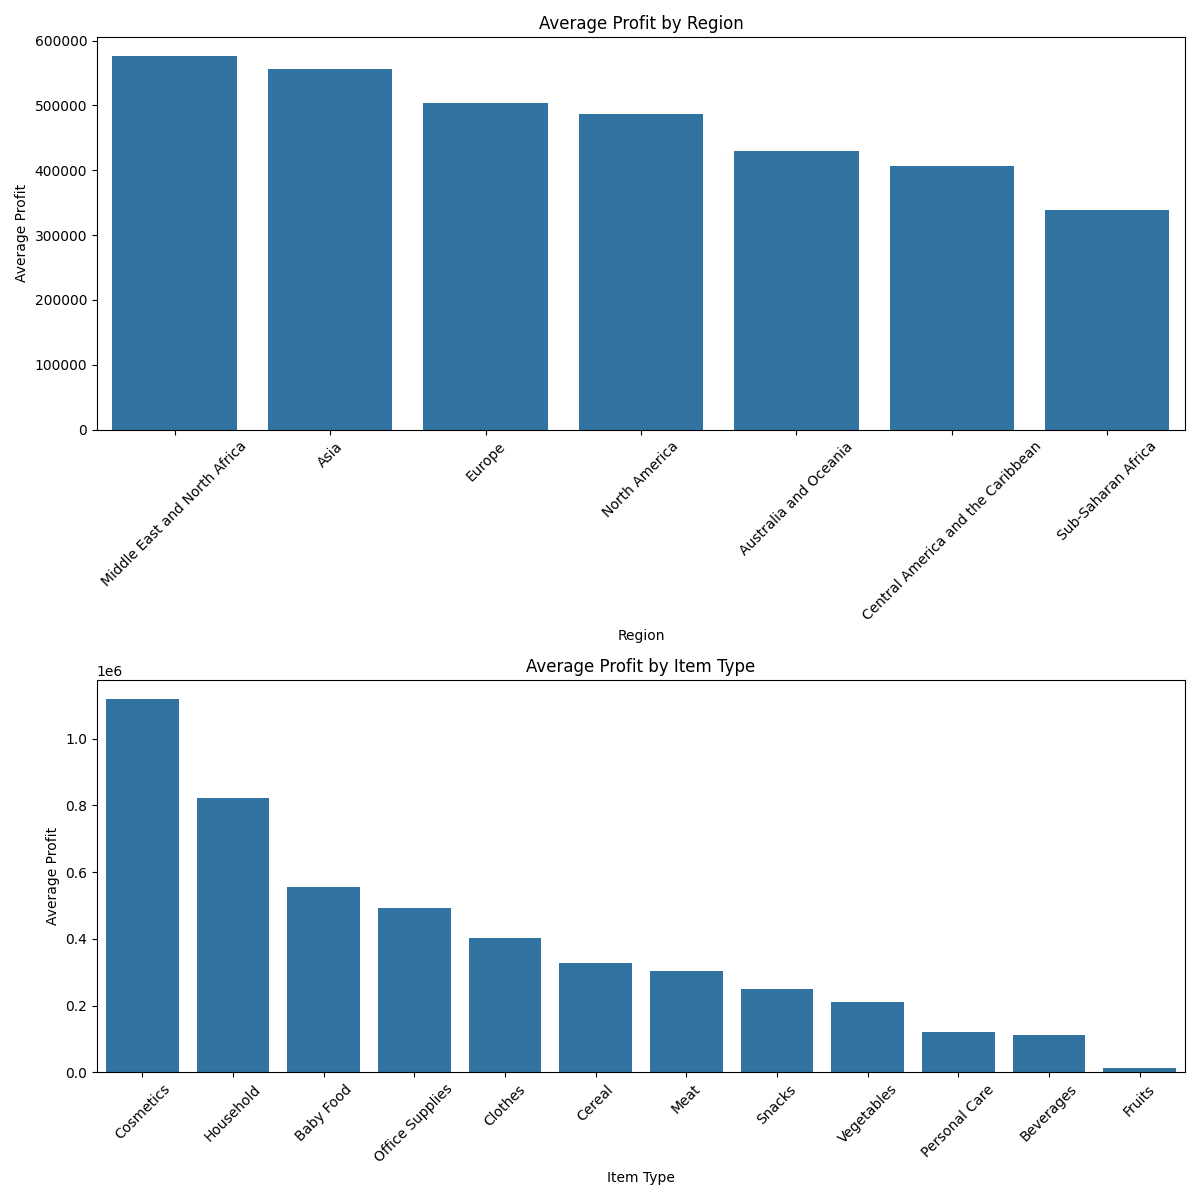

Images displayed.


In [ ]:
from IPython.display import Image, display

# Display the images
images = ['correlation_heatmap.png', 'cumulative_revenue.png', 'profit_analysis.png']
for img in images:
    display(Image(filename=img))

print("Images displayed.")